In [309]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [310]:
steamDF = pd.read_csv("HistoricalQuotes.csv")

Add Seasonality

In [311]:
steamDF["Date"] = pd.to_datetime(steamDF["Date"])
steamDF["Month"] =  steamDF['Date'].dt.month
steamDF["Year"] = steamDF['Date'].dt.year
steamDF["Quarter"] = steamDF['Month']
steamDF['Quarter'].replace([1,2,3], 1, inplace=True)
steamDF['Quarter'].replace([4,5,6], 2, inplace=True)
steamDF['Quarter'].replace([7,8,9], 3, inplace=True)
steamDF['Quarter'].replace([10,11,12], 4, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16396\3351137242.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  steamDF['Quarter'].replace([1,2,3], 1, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16396\3351137242.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [312]:
#have to also convert ID number as "total time"

numbers = np.arange(len(steamDF), 0, -1)


steamDF['time'] = numbers

In [313]:
# has to be Volume
X = steamDF.drop('Volume', axis=1)  
y = steamDF['Volume'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3 , random_state = 89)

## Isolate Time

In [314]:
dateDF = X_train["Date"]

if ("Date" in steamDF):
    steamDF.drop("Date", axis=1, inplace=True)
if ("Date" in X_train):
    X_train.drop("Date", axis=1, inplace=True)
if ("Date" in X_test):
    X_test.drop("Date", axis=1 , inplace=True)

In [315]:
steamDF.head()

,Close,Volume,Open,High,Low,Month,Year,Quarter,time
0,273.36,106721200,257.26,278.41,256.37,2,2020,1,2518
1,273.52,80151380,281.10,286.00,272.96,2,2020,1,2517
2,292.65,49678430,286.53,297.88,286.50,2,2020,1,2516
3,288.08,57668360,300.95,302.53,286.13,2,2020,1,2515
4,298.18,55548830,297.26,304.18,289.23,2,2020,1,2514


Convert Strings

In [316]:
dateDF

2092   2011-11-02
1990   2012-03-30
1361   2014-10-01
693    2017-05-26
1124   2015-09-10
          ...    
1323   2014-11-24
534    2018-01-12
2180   2011-06-29
286    2019-01-09
1939   2012-06-13
Name: Date, Length: 1762, dtype: datetime64[ns]

## Linear Regression

In [317]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression() #empty template to be trained
linear_model.fit(X_train, y_train)

LinearRegression()

In [318]:
len(y_test)

756

In [319]:
len(X_test)

756

In [320]:
predictions = linear_model.predict(X_test)

linear_model.score(X_test, predictions)

print(linear_model.score(X_test, y_test))

X_test['Residuals'] = (y_test - predictions)



0.6400974584651213


## Receiving Inputs

In [321]:
inputDF = pd.read_csv("Book1.csv")

In [322]:
close1 = inputDF['Close'][0]
open1 = inputDF[' Open'][0]
volume1 = inputDF['Volume'][0]
high1 = inputDF[' High'][0]
low1 = inputDF[' Low'][0]

## Create Equation

In [323]:
coef = linear_model.coef_
coef


array([-5.56967265e+03,  1.50839349e+06,  1.08411767e+07, -1.22133765e+07,
       -5.88523491e+06, -4.87979243e+07,  3.16644347e+06,  1.12403070e+05])

In [324]:
#remember to check order

#the equation for revenue = [Price * Volume]
#                         = [Price * (coef*Price + coef*season + .... + residuals)]
#steamDF['optPrice'] = steamDF['Price']*coef[0]*2 + steamDF['']*coef[1] + residuals


In [ ]:
values_test = pd.DataFrame( y_test, columns='Values')
values_test

,0
0,104693151
1,27391950
2,48032600
3,50607747
4,22560440
...,...
751,50142667
752,66454720
753,54628650
754,108637023


In [326]:

timeDF = pd.concat([dateDF, y_test], axis=1)
timeDF

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

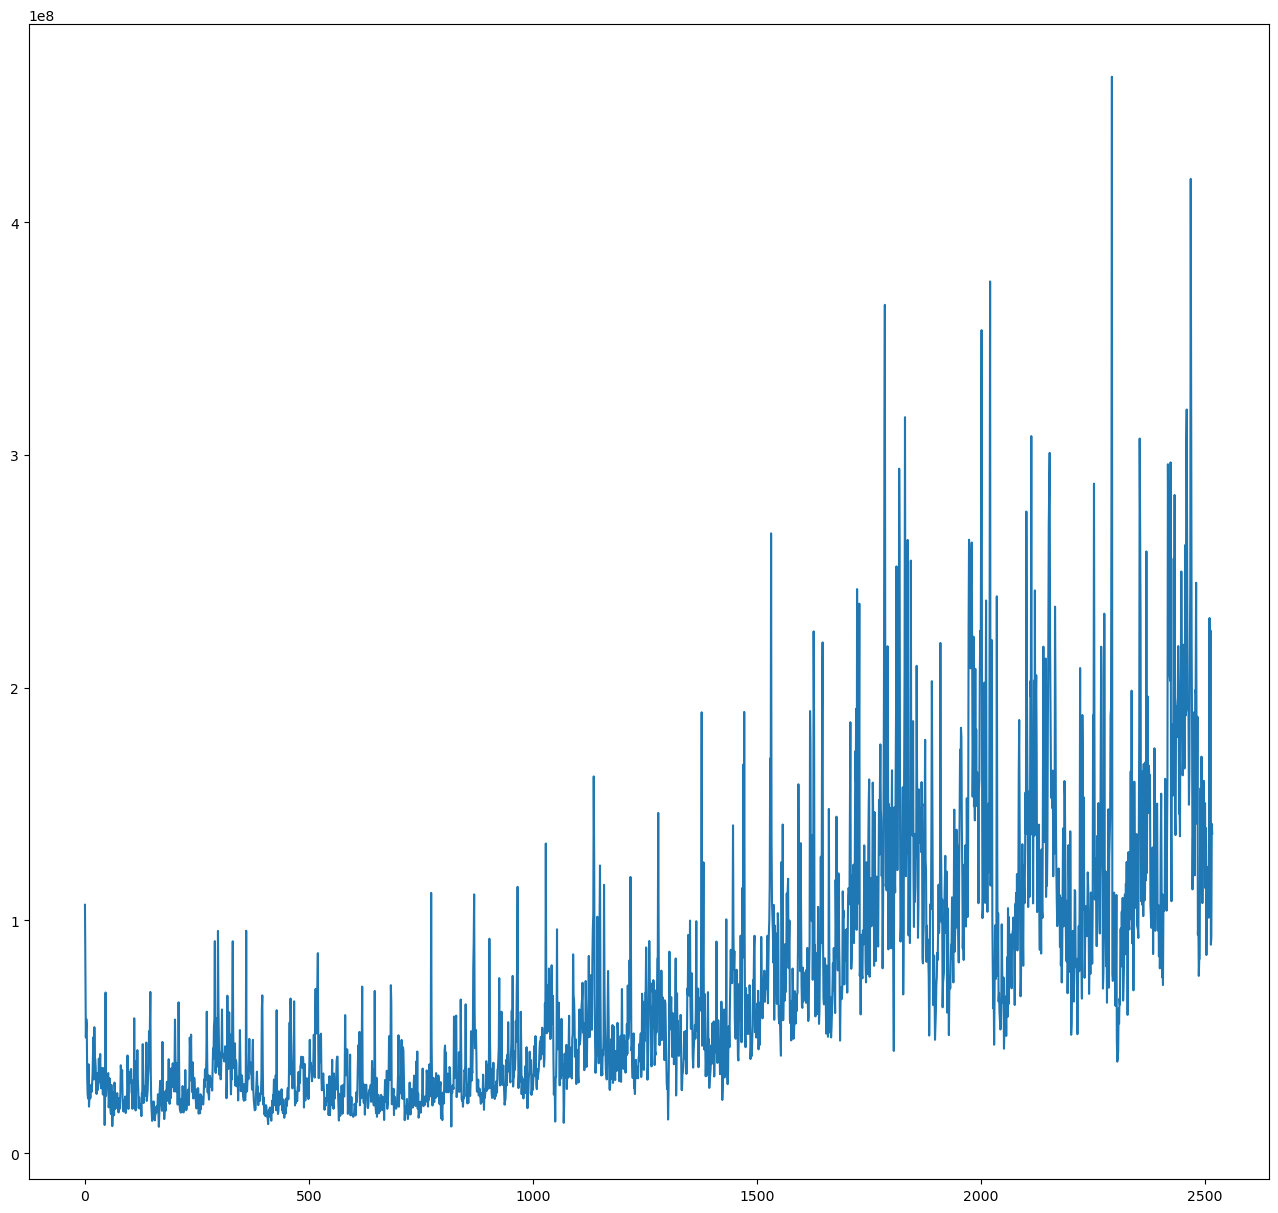

In [198]:
plt.xlabel = ('Time')
plt.ylabel = ('Optimal Price')

opDF = timeDF['Volume']
plt.figure(figsize=(16,15))

plt.plot(opDF)
plt.show()

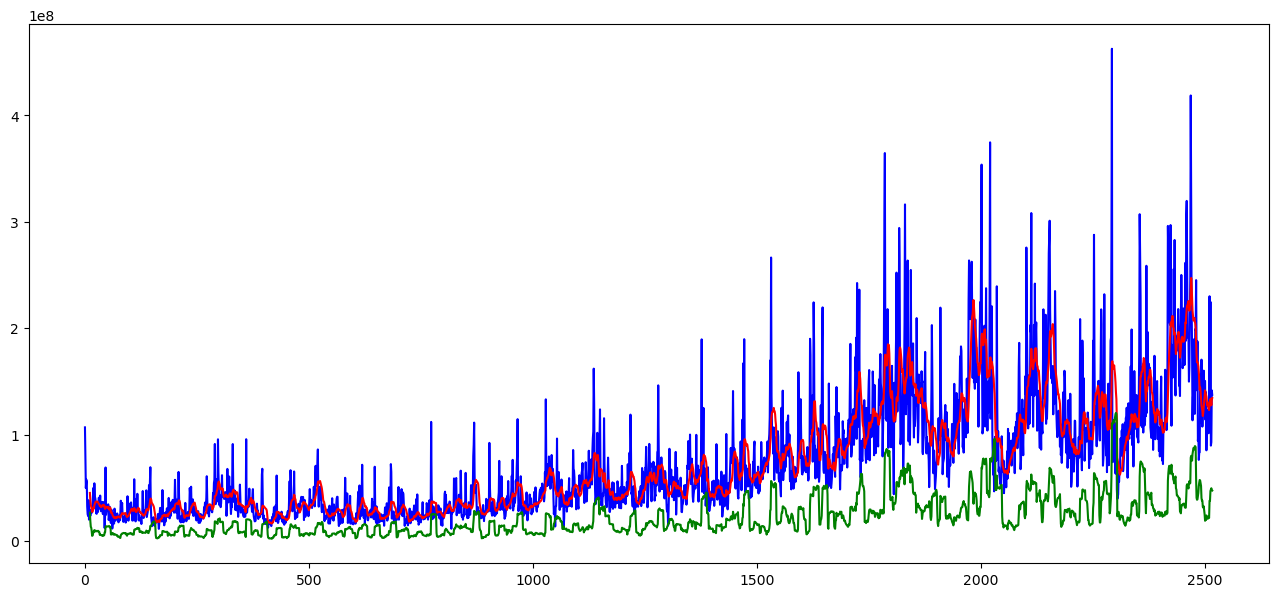

In [199]:
rollmean = opDF.rolling(12).mean()
rollstd = opDF.rolling(12).std()

plt.figure(figsize=(16,7))

orig = plt.plot(opDF, color = 'blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Mean')
std = plt.plot(rollstd, color='green', label='Standard Deviation')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose


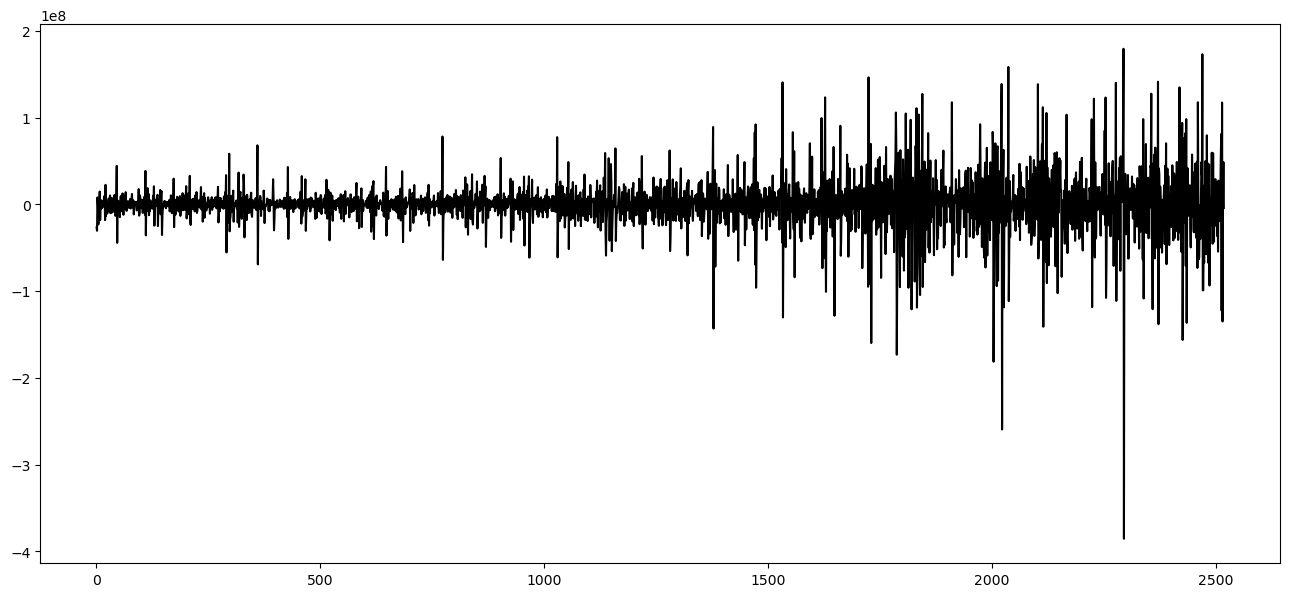

In [246]:
df_diff = opDF - opDF.shift()
df_diff = df_diff.dropna()

plt.figure(figsize=(16,7))

plt.plot(df_diff, label='Original', color='black')

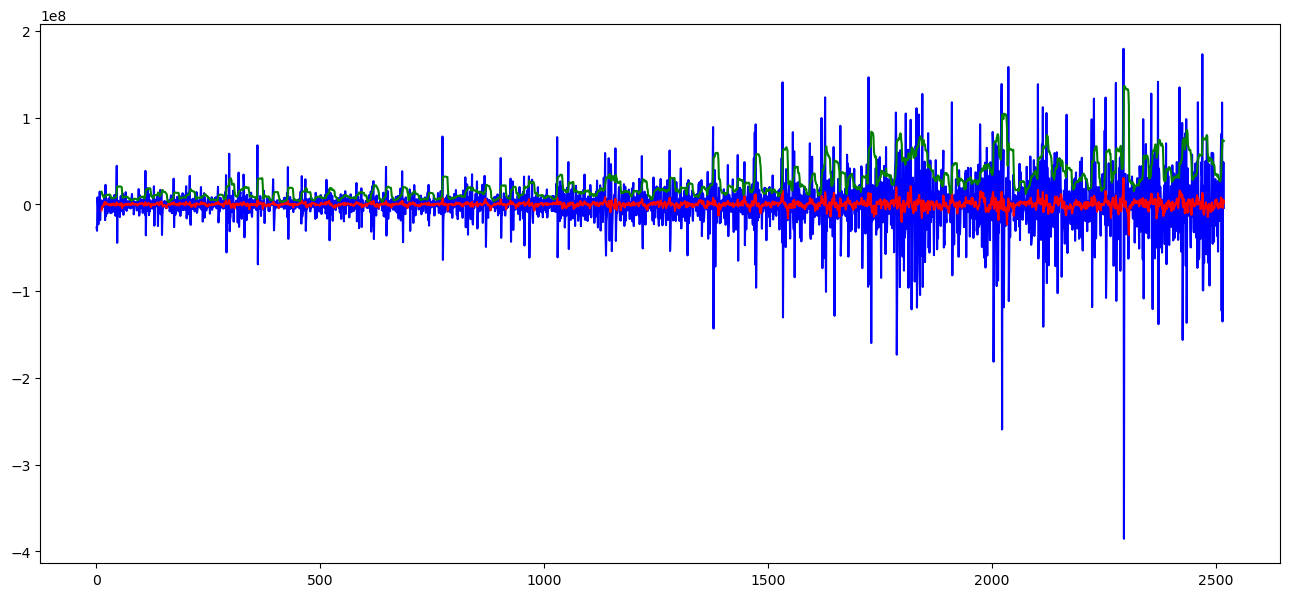

In [247]:
rollmean2 = df_diff.rolling(12).mean()
rollstd2 = df_diff.rolling(12).std()

plt.figure(figsize=(16,7))

orig = plt.plot(df_diff, color = 'blue', label='Original')
mean = plt.plot(rollmean2, color='red', label='Mean')
std = plt.plot(rollstd2, color='green', label='Standard Deviation')

plt.show()

In [248]:
decompose2 = seasonal_decompose(df_diff, model='additive',period=1)

trend2 =  decompose2.trend
season2 = decompose2.seasonal
resid2 = decompose2.resid

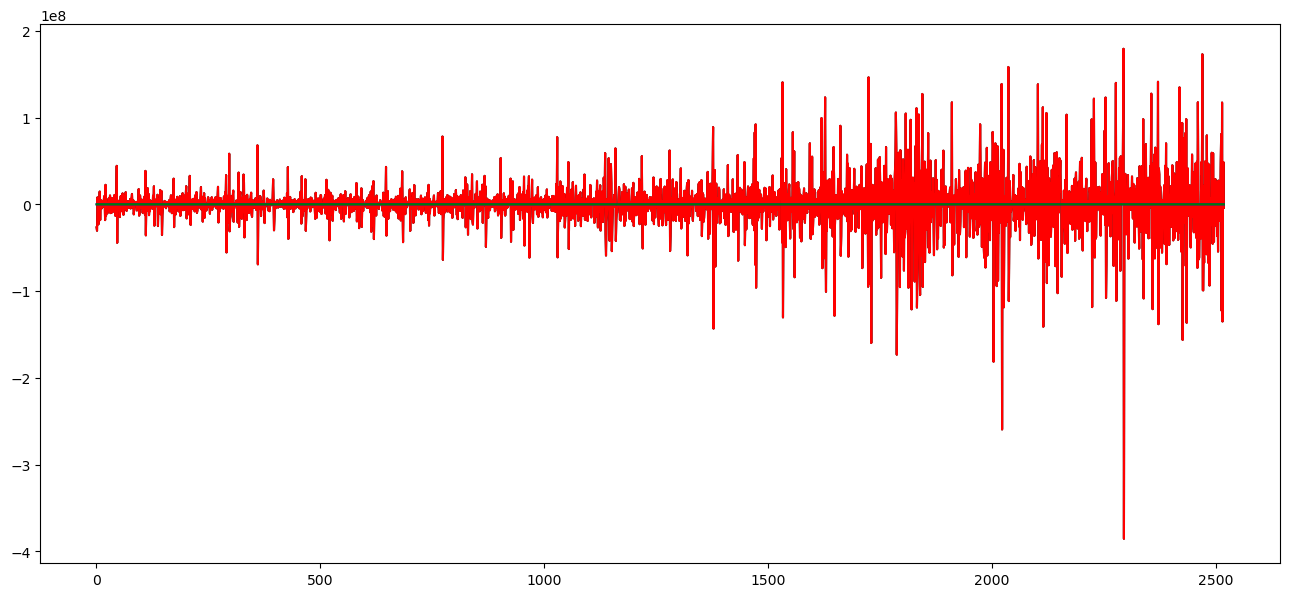

In [249]:
plt.figure(figsize=(16,7))

plt.plot(df_diff, label='Original', color='black')
plt.plot(trend2, label='Trend', color = 'red')
plt.plot(season2, label='Season', color='blue')
plt.plot(resid2, label='Resid', color='green')

plt.show()

## Create An Arima Model (Time Series)

In [250]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df_diff, order=(1,1,1))

arima_fit = arima.fit()

c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


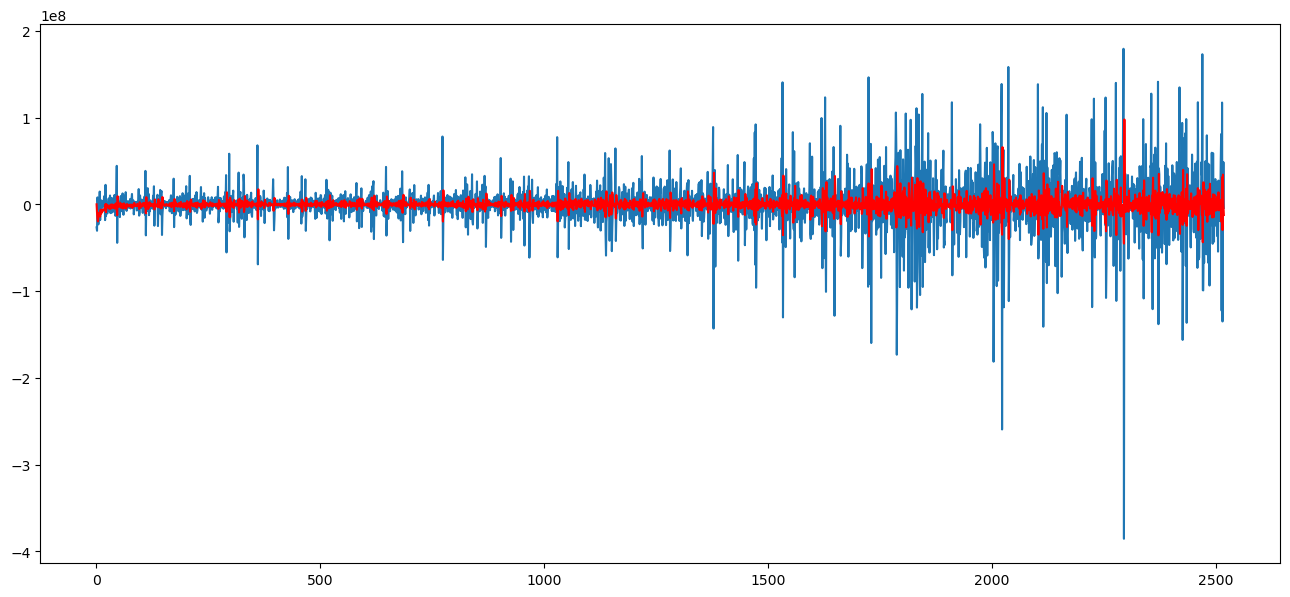

In [251]:
plt.figure(figsize=(16,7))
plt.plot(df_diff)
plt.plot(arima_fit.fittedvalues, color='red')

## Return Back to Original Scale

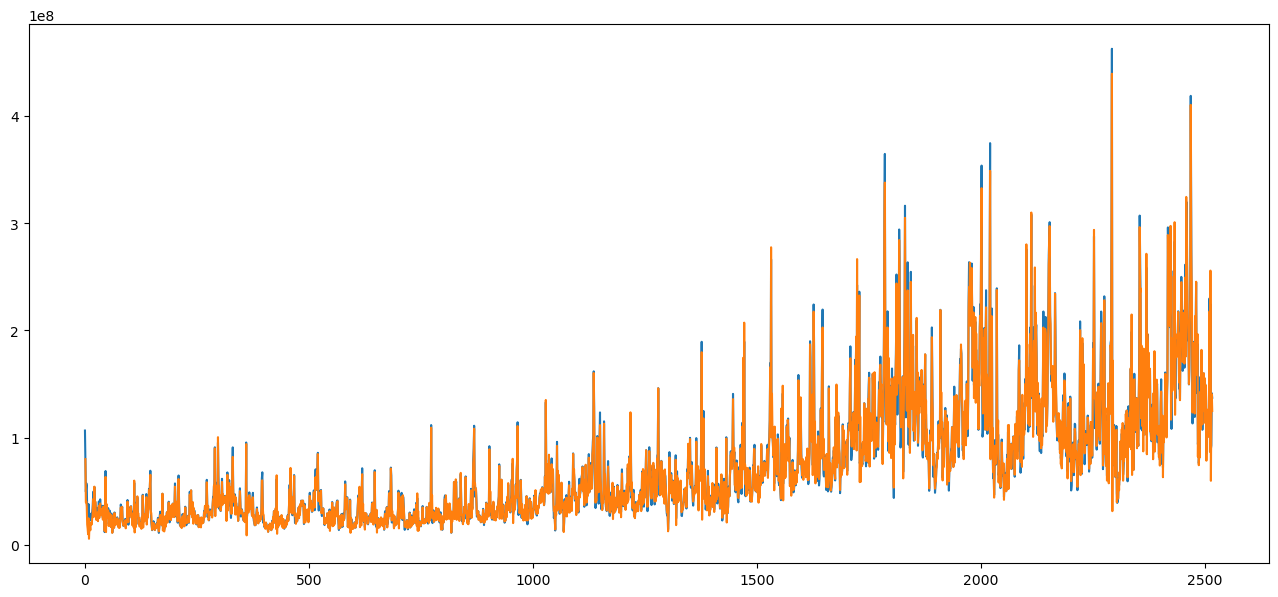

In [252]:
arimaSeries = pd.Series(arima_fit.fittedvalues, copy=True)
arimaSum = arimaSeries.cumsum()

plt.figure(figsize=(16,7))

plt.plot(opDF)
plt.plot(arimaSeries + opDF)